# Tasca M4 T01

## **Exercici 1**
**Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.**

**Crea almenys una visualització per:**

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)

In [1]:
import pandas as pd

In [2]:
#carrego l'arxiu:
barri = "C:/Users/julia/Downloads/preu lloguer per trimestre i barri.csv"
df = pd.read_csv(barri)

In [3]:
pd.set_option('display.max_rows', None)

In [114]:
df.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


df es la base de dades 'Preu lloguer per trimestre i barri'. Hi trobem el preu del lloguer mensula mitjà i el preu mitjà per m2 mensual per cada barri durant els 4 trimestres de l'any 2021. Cal tenir en compte que els barris estan agrupats per districtes. Un districte pot tenir diferents barris associats però un barri només pot tenir un districte. A cada barri i districte se li ha assignat un codi unic.

Miro el format de les dades:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


Dtype int64 ens indica que son nombres enters. Object ens indica que es una cadena de text. L'error aqui, és que el preu esta definit com a object i hauria de ser float64 ja que el preu conté comes. Per tant utilitzo pd.to_numeric() per convertir la columna Preu a tipus numeric. El parametre errors="coerce" fa que qualsevol valor que tingui caracters no numerics esdevingui NaN.

In [6]:
df["Preu"] = pd.to_numeric(df["Preu"], errors="coerce")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [7]:
df.isna().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

He revisat perque hi ha 44 valors NaN i es perque no hi ha dades a la taula df.

In [8]:
df[df["Preu"].isnull()]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN
41,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),NaN
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN
53,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN
55,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
57,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),NaN
84,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),NaN
114,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),NaN
119,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),NaN
126,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),NaN


In [9]:
la_marina_del_prat_vermell = df[df["Nom_Barri"] == "la Marina del Prat Vermell"][['Trimestre','Lloguer_mitja',"Preu"]]

la_marina_del_prat_vermell

,Trimestre,Lloguer_mitja,Preu
11,1,Lloguer mitjà mensual (Euros/mes),NaN
84,1,Lloguer mitjà per superfície (Euros/m2 mes),NaN
157,2,Lloguer mitjà mensual (Euros/mes),NaN
230,2,Lloguer mitjà per superfície (Euros/m2 mes),NaN
303,3,Lloguer mitjà mensual (Euros/mes),NaN
376,3,Lloguer mitjà per superfície (Euros/m2 mes),NaN
449,4,Lloguer mitjà mensual (Euros/mes),NaN
522,4,Lloguer mitjà per superfície (Euros/m2 mes),NaN


Veiem que de la marina del prat vermell no tenim informació de ningun trimestre.
Com es pot veure treballem amb dos preus de lloguer. Aixi que fare dos dataframes, perque aixi a l'hora de netejar el df sigui mes fàcil i despres sigui més comode treballar amb les dades:


In [10]:
lloguer_mitja = df[df["Lloguer_mitja"] == "Lloguer mitjà mensual (Euros/mes)"]

#també es pot fer aixi:
# df_mensual = df[df['Lloguer_mitja'].str.contains('mensual')]

lloguer_mitja_superficie = df.loc[df["Lloguer_mitja"] == "Lloguer mitjà per superfície (Euros/m2 mes)"]

# df_superficie = df[df['Lloguer_mitja'].str.contains('superfície')]

In [11]:
lloguer_mitja.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [12]:
lloguer_mitja_superficie.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9


Faig un codi per saber quins barris hi ha a cada districte que sino tinc un embolic:

In [13]:
districte = 'Nou Barris'
barris_dist = df[df['Nom_Districte'] == districte]['Nom_Barri'].unique()
print("Els barris de", districte, "son :")
for barri in barris_dist:
    print(barri)

Els barris de Nou Barris son :
Vilapicina i la Torre Llobeta
Porta
el Turó de la Peira
Can Peguera
la Guineueta
Canyelles
les Roquetes
Verdun
la Prosperitat
la Trinitat Nova
Torre Baró
Ciutat Meridiana
Vallbona


In [14]:
lloguer_mitja[df["Preu"].isnull()]

C:\Users\julia\AppData\Local\Temp\ipykernel_36992\794752450.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lloguer_mitja[df["Preu"].isnull()]


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN
41,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),NaN
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN
53,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN
55,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
57,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),NaN
157,2021,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN
187,2021,2,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),NaN
192,2021,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN
199,2021,2,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN


In [15]:
lloguer_mitja_superficie[df["Preu"].isnull()]

C:\Users\julia\AppData\Local\Temp\ipykernel_36992\2123101654.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lloguer_mitja_superficie[df["Preu"].isnull()]


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
84,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),NaN
114,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),NaN
119,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),NaN
126,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),NaN
128,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),NaN
130,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),NaN
230,2021,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),NaN
260,2021,2,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),NaN
265,2021,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),NaN
272,2021,2,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),NaN


In [16]:
#Calculo la mitjana per cada barri de Barcelona
lloguer_mitja_per_barri = lloguer_mitja.groupby('Nom_Barri')['Preu'].mean()
lloguer_mitja_per_barri

Nom_Barri
Baró de Viver                                    532.100
Can Baró                                         756.500
Can Peguera                                          NaN
Canyelles                                        742.375
Ciutat Meridiana                                 525.700
Diagonal Mar i el Front Marítim del Poblenou    1073.725
Horta                                            749.400
Hostafrancs                                      791.325
Montbau                                          740.350
Navas                                            820.525
Pedralbes                                       1693.575
Porta                                            714.725
Provençals del Poblenou                          950.500
Sant Andreu                                      766.650
Sant Antoni                                      929.375
Sant Genís dels Agudells                         703.825
Sant Gervasi - Galvany                          1355.050
Sant Gervasi - la Bon

In [17]:
#mitjana per districte
lloguer_mitja_districte = lloguer_mitja.groupby('Nom_Districte')['Preu'].mean()
lloguer_mitja_districte_sup = lloguer_mitja_superficie.groupby('Nom_Districte')['Preu'].mean()

In [18]:
lloguer_mitja_districte_sup

Nom_Districte
Ciutat Vella           13.775000
Eixample               13.300000
Gràcia                 13.380000
Horta-Guinardó         11.987500
Les Corts              14.008333
Nou Barris             10.922500
Sant Andreu            11.153846
Sant Martí             13.440000
Sants-Montjuïc         12.678571
Sarrià-Sant Gervasi    15.012500
Name: Preu, dtype: float64

Un cop tenim, les mitjanes per barri i per districte podem començar a jugar amb les dades. La professora m'ha dit que he de fer una interpolació però després de buscar per internet no se ben bé com i perquè.

Veient que no puc utilitzar les mitjanes del barri per omplir els valors nuls, procedeixo a directament a utilitzar la mitjana del districte.




In [19]:
lloguer_mitja['Preu'] = lloguer_mitja['Preu'].fillna(lloguer_mitja["Nom_Districte"].map(lloguer_mitja_districte))
#Aquest codi m'agrada molt perque el que esta fent es: .fillna() s'utilitza per omplir els valors nuls d'un valor especific en aquest cas el preu i la funcio .map() mapeja els valors que ens interesa.

C:\Users\julia\AppData\Local\Temp\ipykernel_36992\2754326643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloguer_mitja['Preu'] = lloguer_mitja['Preu'].fillna(lloguer_mitja["Nom_Districte"].map(lloguer_mitja_districte))


In [20]:
lloguer_mitja.isna().sum()


Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

Ara ja no trobem valors nuls en cap columna, ja que els hem atribuit la mitjana del districte. Despres de fer una  mica de recerca, he pogut comprovar que hi ha bastanta similaritat entre els barris que contenien valors nuls i els barris que completaven el seu districte, per tant podriem dir que es acceptable atribuir aquest valor.

In [21]:
lloguer_mitja[(lloguer_mitja["Codi_Barri"]==47) & (lloguer_mitja["Codi_Districte"]==8)]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),664.2925
192,2021,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),664.2925
338,2021,3,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),664.2925
484,2021,4,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),664.2925


A la taula superior es pot comprovar que cada barri té el mateix valor de preu pels quatre trimestres, ja que equival a la mitjana trimestral.
Ara procedim a realitzar el mateix, pero amb l'altre df de lloguer mitja per superficie:


In [22]:
lloguer_mitja_superficie['Preu'] = lloguer_mitja_superficie['Preu'].fillna(lloguer_mitja_superficie["Nom_Districte"].map(lloguer_mitja_districte_sup))

C:\Users\julia\AppData\Local\Temp\ipykernel_36992\1799061711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloguer_mitja_superficie['Preu'] = lloguer_mitja_superficie['Preu'].fillna(lloguer_mitja_superficie["Nom_Districte"].map(lloguer_mitja_districte_sup))


In [23]:
lloguer_mitja_superficie.isna().sum()


Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [115]:
lloguer_mitja_superficie.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9


In [25]:
lloguer_mitja_superficie[(lloguer_mitja_superficie["Codi_Barri"]==47) & (lloguer_mitja_superficie["Codi_Districte"]==8)]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
119,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),10.9225
265,2021,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),10.9225
411,2021,3,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),10.9225
557,2021,4,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),10.9225


I amb aixo tindriem dos dataframes nets segons el tipus de lloguer.

# Visualització Gràfica de les Dades

## - Exercici 2
**Exporta els gràfics com imatges o com HTML.**


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Una variable categòrica (Districte)

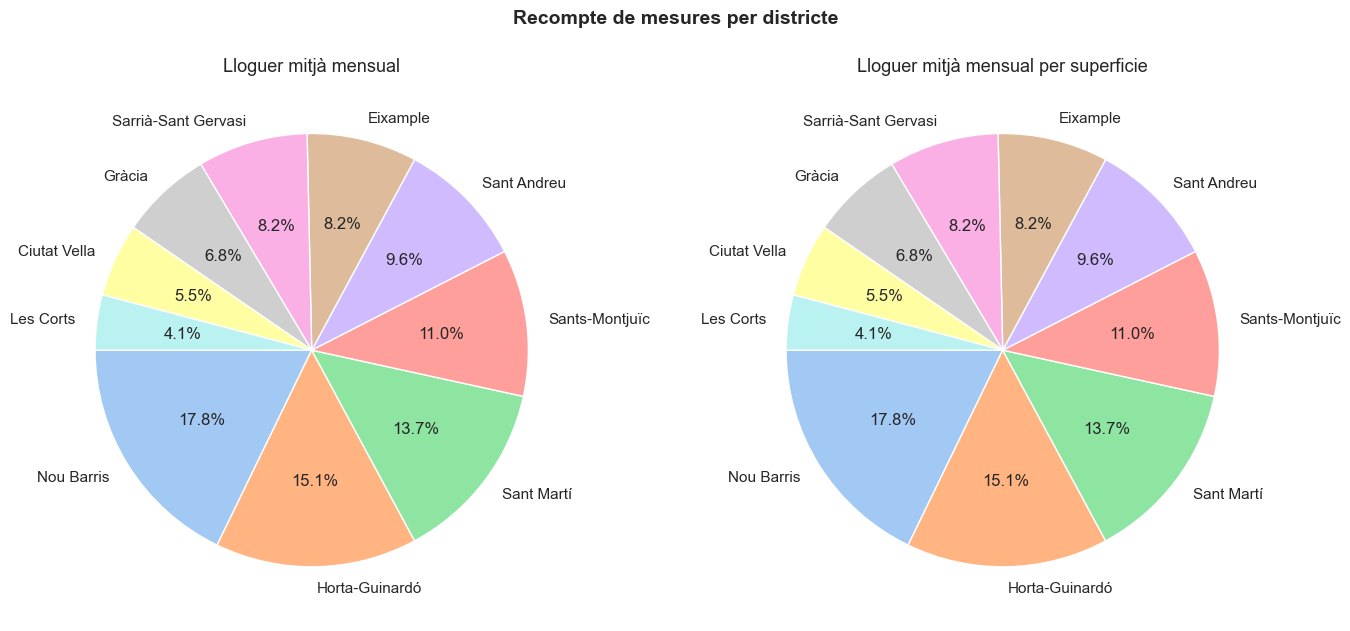

In [36]:
n_dades = lloguer_mitja['Nom_Districte'].value_counts()
n_dades2 = lloguer_mitja_superficie['Nom_Districte'].value_counts()

plt.figure(figsize=(14,6 ))

plt.subplot(1,2,1)
plt.pie(n_dades, labels=n_dades.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Lloguer mitjà mensual', fontsize=13)

plt.subplot(1,2,2)
plt.pie(n_dades2, labels=n_dades.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Lloguer mitjà mensual per superficie', fontsize=13)

plt.tight_layout()
plt.suptitle("Recompte de mesures per districte", fontweight='bold', y=1.05, fontsize=14)

plt.savefig('Recompte_mesures_districte.png')
plt.show()


Com bé s'oberva, en els dos datasets tenim el mateix nombre de mesures, per lo qual no caldria representar els dos grafics pastís. Nou barris és el barri que té més mesures, amb el 17,8% de les mesures. I les corts es el que té menys mesures, amb el 4,1%. Pero si ho volem veure amb valors absoluts es millor veure-ho en un grafic de barres:


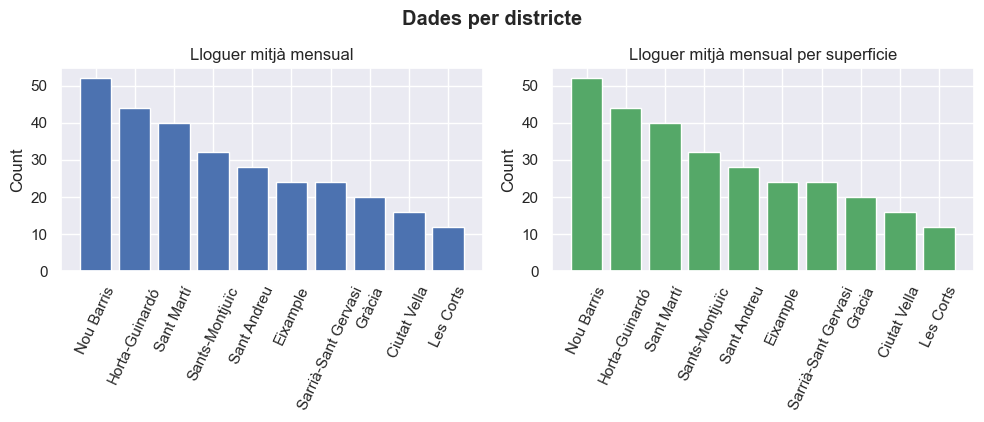

In [37]:
plt.figure(figsize=(10,4))

# Gráfic de barres: Lloguer mitjà mensual
plt.subplot(1,2,1)
#plt.bar(x, height, width=0.8, align='center', **kwargs)
plt.bar(n_dades.index, n_dades)
plt.xticks(rotation=65)
plt.ylabel("Count")
plt.title("Lloguer mitjà mensual")

# Gráfic de barres: Lloguer mitjà mensual per superficie
plt.subplot(1,2,2)
plt.bar(n_dades2.index, n_dades2, color = 'g')
plt.xticks(rotation=65)
plt.ylabel("Count")
plt.title("Lloguer mitjà mensual per superficie")

#plt.tight_layout() serveix per ajustar els espais entre els grafics perque es vegin bé
plt.tight_layout()

plt.suptitle("Dades per districte", fontweight='bold', y=1.05)
plt.savefig('Recompte_mesures_districte_2.png')
plt.show()

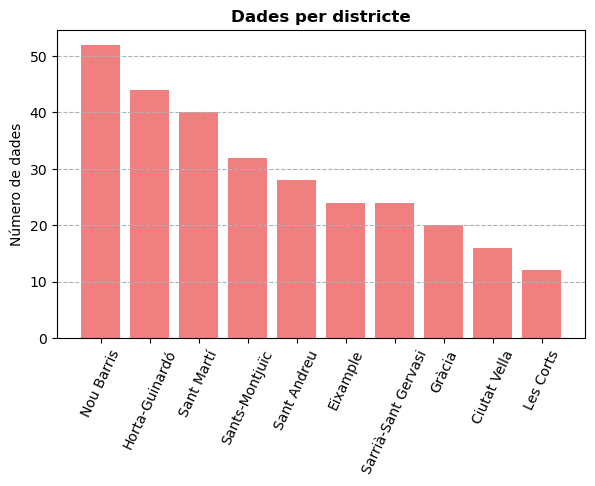

In [30]:
plt.figure(figsize=(15,4))

# Gráfic de barres: Lloguer mitjà mensual
plt.subplot(1,2,1)
#plt.bar(x, height, width=0.8, align='center', **kwargs)
plt.bar(n_dades.index, n_dades, color = 'lightcoral')
plt.xticks(rotation=65)
plt.ylabel("Número de dades")
plt.title("Dades per districte", fontweight='bold' )
plt.grid(axis="y", linestyle="--")

#plt.tight_layout() serveix per ajustar els espais entre els grafics perque es vegin bé
#plt.tight_layout()
plt.savefig('Recompte_mesures_districte_bo.png')
plt.show()


## Una variable numèrica (Preu)

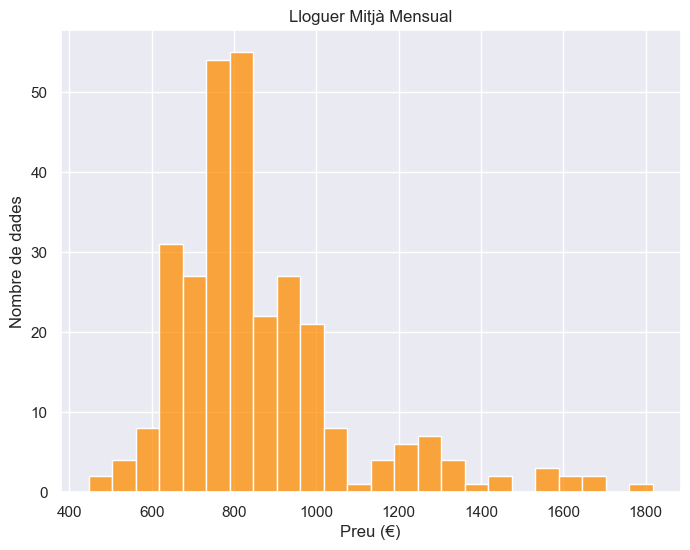

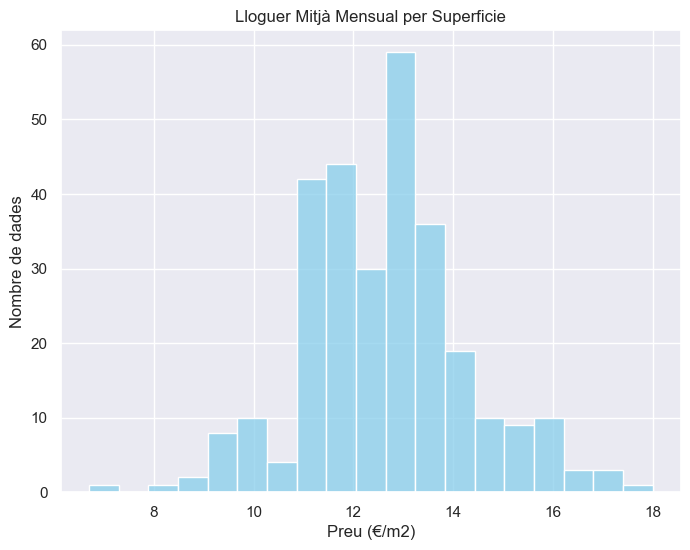

In [38]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.histplot(data=lloguer_mitja, x="Preu", color='darkorange')
plt.ylabel("Nombre de dades")
plt.xlabel("Preu (€)")
plt.title('Lloguer Mitjà Mensual')


plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
sns.histplot(data=lloguer_mitja_superficie, x="Preu", color='skyblue')
plt.ylabel("Nombre de dades")
plt.xlabel("Preu (€/m2)")
plt.title('Lloguer Mitjà Mensual per Superficie')


plt.savefig('Variable_numerica_preu.png')
plt.show()

## Una variable numèrica i una categòrica (Districte i Preu)

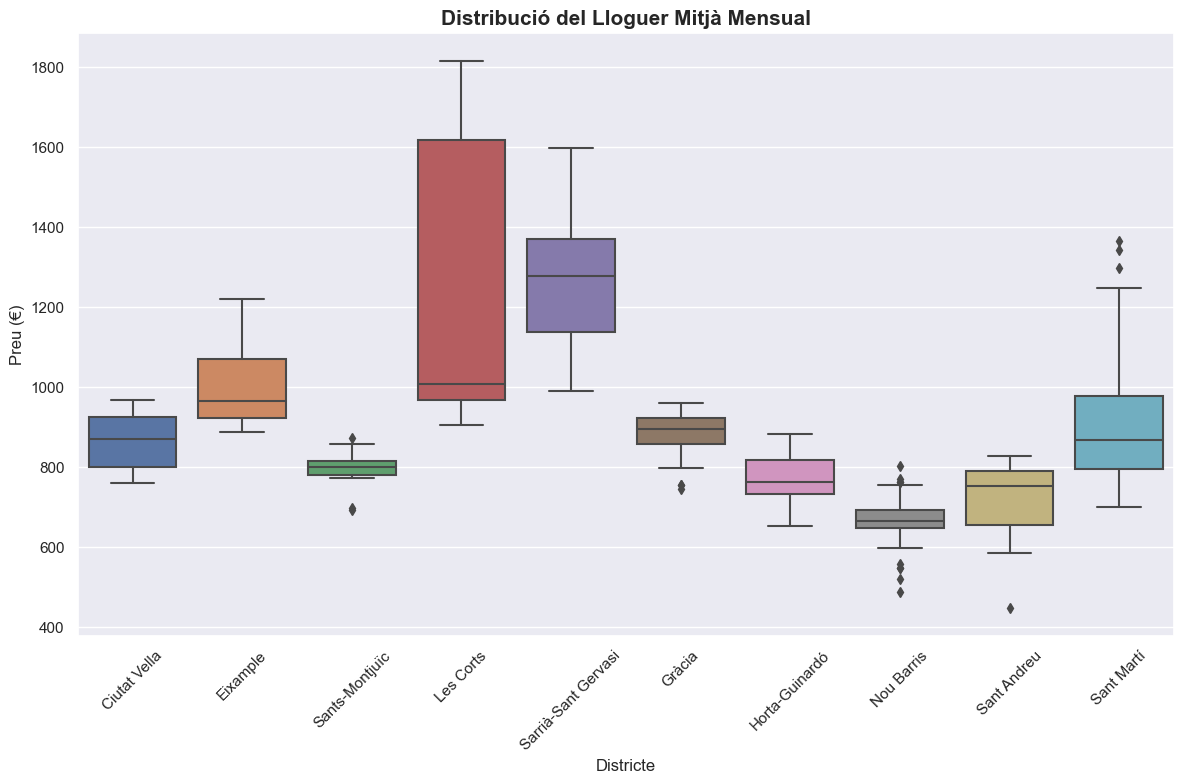

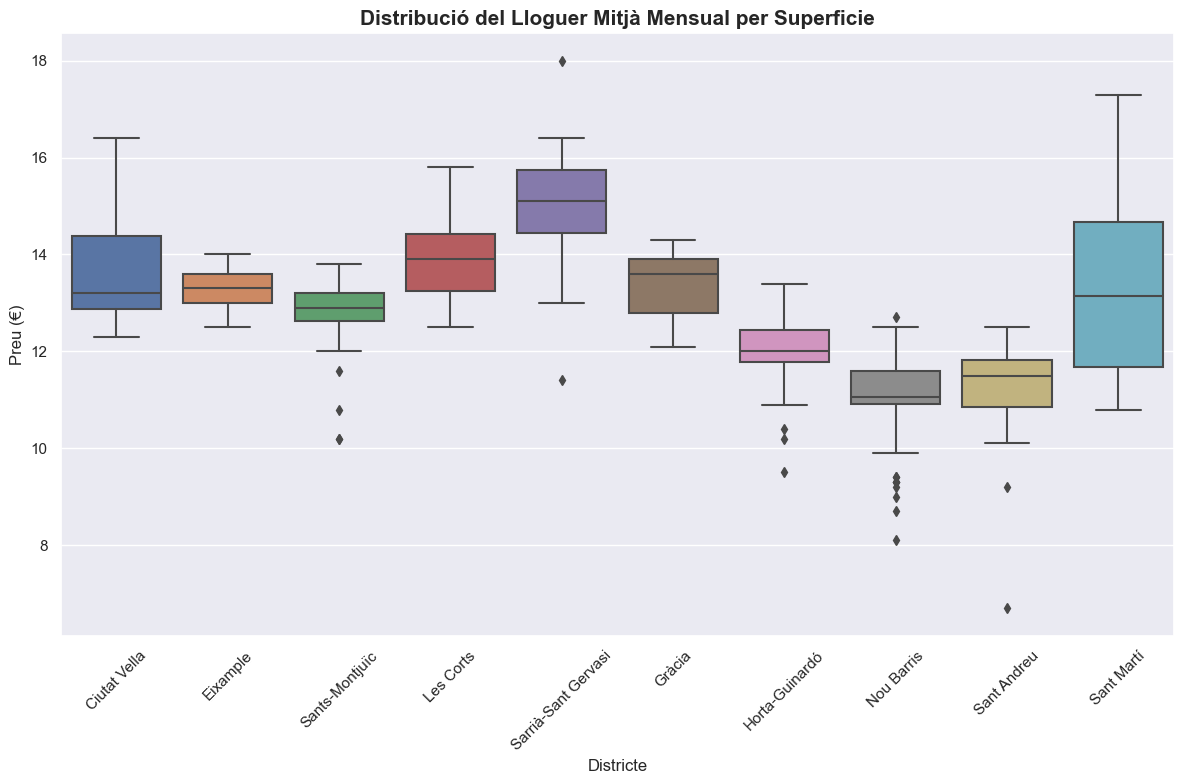

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

#botplox 1
sns.boxplot(data=lloguer_mitja, x='Nom_Districte', y='Preu')
plt.xlabel('Districte')
plt.ylabel('Preu (€)')
plt.title('Distribució del Lloguer Mitjà Mensual', fontsize=15, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
 
#botplox 2
plt.figure(figsize=(12,8))

sns.boxplot(data=lloguer_mitja_superficie, x='Nom_Districte', y='Preu')
plt.xlabel('Districte')
plt.ylabel('Preu (€)')
plt.title('Distribució del Lloguer Mitjà Mensual per Superficie', fontsize=15, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('Variable_numerica_i_categorica_districte_preu.png')
plt.show()


## Dues variables numèriques (Trimestre i Preu)

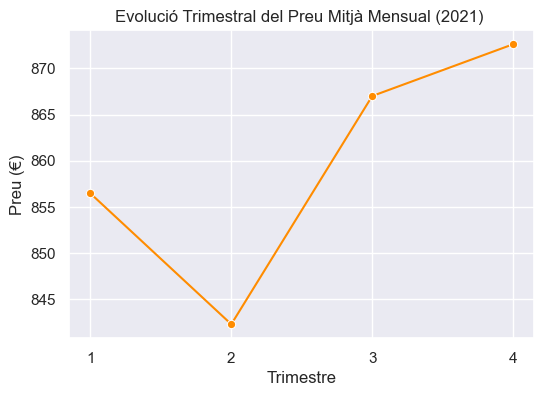

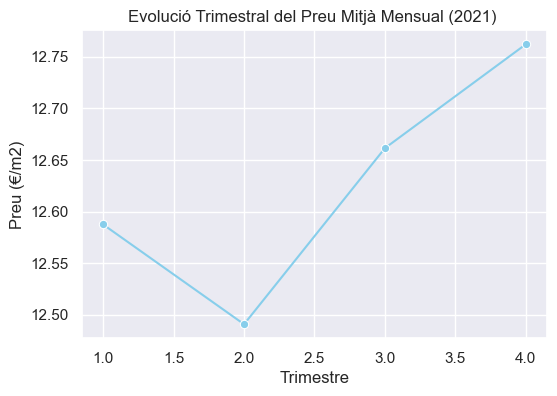

In [40]:
plt.figure(figsize=(6, 4))

sns.lineplot(data=lloguer_mitja, x='Trimestre', y='Preu', errorbar=None, marker = 'o', color='darkorange')
plt.xticks(range(1, 5, 1))
plt.ylabel('Preu (€)')
plt.title ('Evolució Trimestral del Preu Mitjà Mensual (2021) ')

plt.figure(figsize=(6, 4))

sns.lineplot(data=lloguer_mitja_superficie, x='Trimestre', y='Preu', errorbar=None, marker = 'o', color='skyblue')
plt.ylabel('Preu (€/m2)')
plt.title ('Evolució Trimestral del Preu Mitjà Mensual (2021) ')

plt.show()

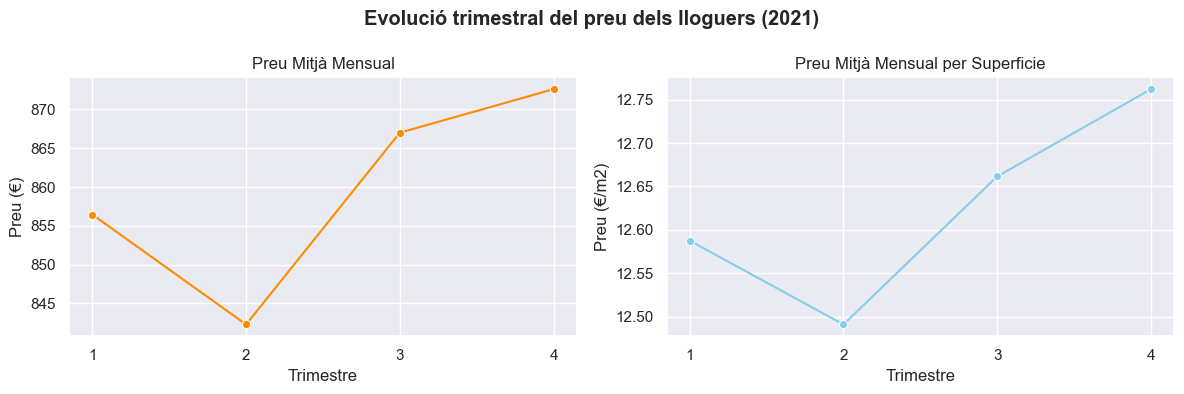

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(data=lloguer_mitja, x='Trimestre', y='Preu', errorbar=None, marker = 'o', color='darkorange', ax=axes[0])
axes[0].set_xticks(range(1, 5, 1))
axes[0].set_ylabel('Preu (€)')
axes[0].set_title('Preu Mitjà Mensual')


sns.lineplot(data=lloguer_mitja_superficie, x='Trimestre', y='Preu', errorbar=None, marker = 'o', color='skyblue', ax=axes[1])
axes[1].set_xticks(range(1, 5, 1))
axes[1].set_ylabel('Preu (€/m2)')
axes[1].set_title ('Preu Mitjà Mensual per Superficie')

plt.suptitle("Evolució trimestral del preu dels lloguers (2021)", fontweight='bold')
plt.tight_layout()

plt.savefig('Dues_variables_numeriques.png')

plt.show()

## Tres variables (Districte, Trimestre i Preu)

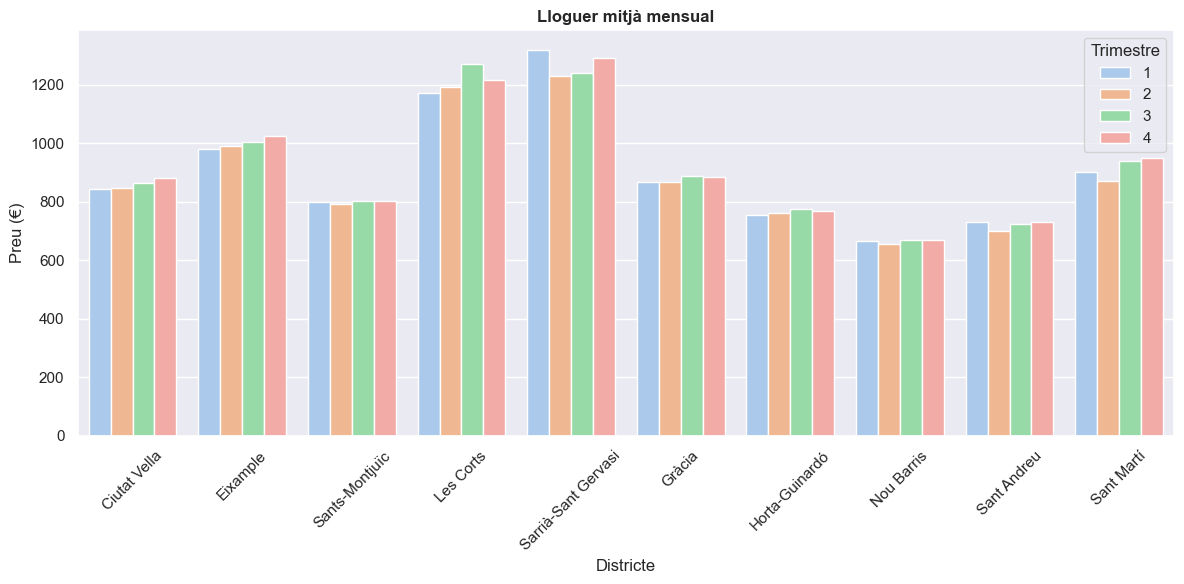

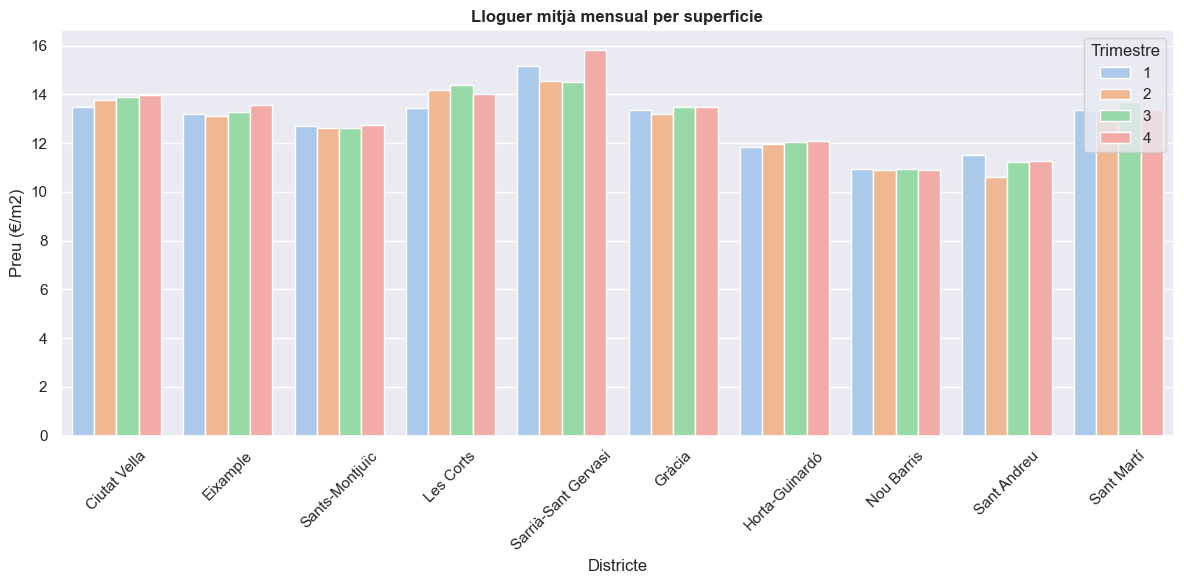

In [35]:
plt.figure(figsize=(12, 6))

sns.barplot(data=lloguer_mitja, x='Nom_Districte', y='Preu', hue='Trimestre', errorbar=None, palette='pastel')
plt.xlabel('Districte')
plt.ylabel('Preu (€)')
plt.title('Lloguer mitjà mensual', fontweight ='bold')
plt.xticks(rotation=45)
plt.legend(title='Trimestre')
plt.tight_layout()

plt.figure(figsize=(12,6))

sns.barplot(data=lloguer_mitja_superficie, x='Nom_Districte', y='Preu', hue='Trimestre', errorbar=None, palette='pastel')
plt.xlabel('Districte')
plt.ylabel('Preu (€/m2)')
plt.title('Lloguer mitjà mensual per superficie', fontweight ='bold')
plt.xticks(rotation=45)
plt.legend(title='Trimestre')


plt.tight_layout()
plt.savefig('Tres_variables.png')

plt.show()


## - Exercici 3
**Proposa alguna visualització que creguis que pot resultar interessant.**

Visualitzaré la diferencia del preu de lloguer entre els diferents barris del districte de Sants-Montjuic.

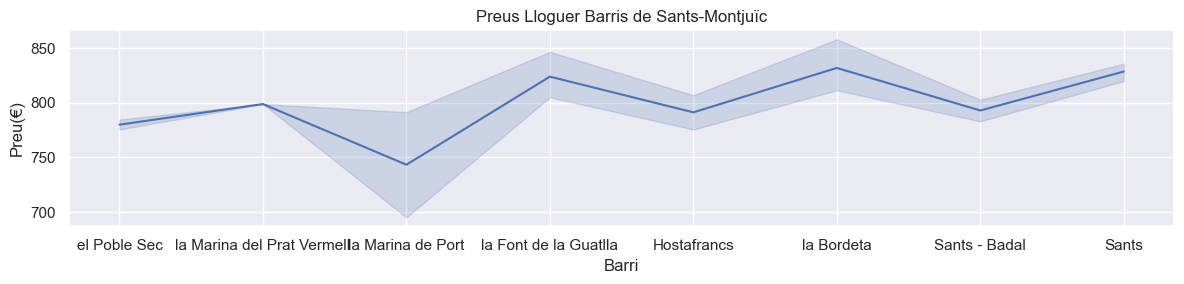

In [111]:
sants_montjuic = lloguer_mitja[lloguer_mitja['Nom_Districte'] == 'Sants-Montjuïc']

plt.figure(figsize=(12,3))

sns.lineplot(data=sants_montjuic, x='Nom_Barri', y='Preu', markers=True, err_style ='band')
plt.xticks(rotation=0)
plt.title('Preus Lloguer Barris de Sants-Montjuïc')
plt.xlabel('Barri')
plt.ylabel('Preu(€)')
plt.tight_layout()
plt.show()


En el grafic de d'alt volia fer una representació dels preus però he arribat a la conclusió que no era el gràfic més ideal ja que no estem mesurant una tendencia o una evolució, aleshores he pensat que es millor representar els preus per barri en forma de barplot i aixi veureho amb valors absoluts.

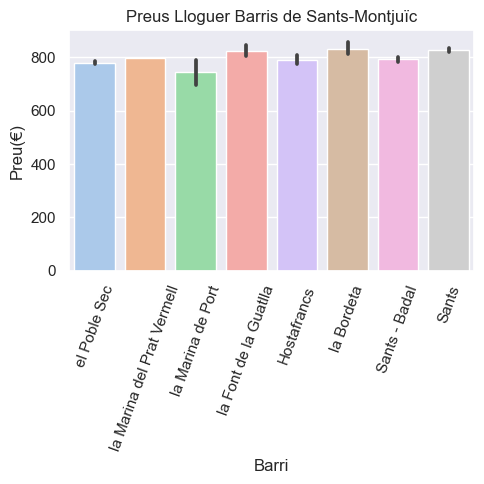

In [113]:
sants_montjuic = lloguer_mitja[lloguer_mitja['Nom_Districte'] == 'Sants-Montjuïc']

plt.figure(figsize=(5,5))

sns.barplot(data=sants_montjuic, x='Nom_Barri', y='Preu', palette = 'pastel')
plt.xticks(rotation=70)
plt.title('Preus Lloguer Barris de Sants-Montjuïc')
plt.xlabel('Barri')
plt.ylabel('Preu(€)')
plt.tight_layout()

plt.savefig('Preus_lloguer_sants_montjuic.png')
plt.show()
